# Simulación fronteras óptimas y RMT


In [2]:
import numpy as np
from scipy.linalg import eigh
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## Ejemplo 1: Desigualdad de frontera optima

In [4]:
# Risk function (True & In)
def Risk2_same(g, w, C):
    Risk2 = g**2/(w.T@np.linalg.inv(C)@w)
    return(Risk2)

# Risk function (Out)
def Risk2_out(g, w, E, C):
    Risk2 = (g**2)*(w.T@np.linalg.inv(E)@C@np.linalg.inv(E)@w)/(w.T@np.linalg.inv(E)@w)**2
    return(Risk2)

In [5]:
### Parametros

p = 100
n = 200
w = np.ones([100])
G = np.linspace(0,100,1000)
m = len(G)

In [6]:
### Covarianza poblacional
C = np.identity(p)
np.fill_diagonal(C, 0.2)
Sigma = C

In [7]:
### Covarianza muestral
Z = np.random.normal(0,1, (p, n))
D = np.zeros([p,p])
np.fill_diagonal(D, np.sqrt(0.2))
X = D@Z
E = np.cov(X)


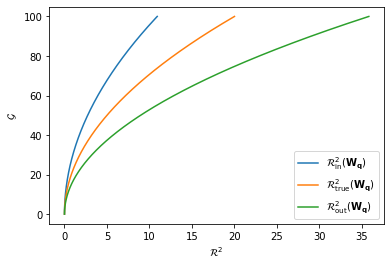

In [8]:

### Graficamos


plt.figure()

# IN
VAR_in = np.zeros([m])
for i in range(m):
    VAR_in[i] = Risk2_same(G[i],w,E)
plt.plot(VAR_in,G,label='$\mathcal{R}_{\mathrm{in}}^2(\mathbf{W_q})$')  

# TRUE
VAR_true = np.zeros([m])
for i in range(m):
    VAR_true[i] = Risk2_same(G[i],w,C)
plt.plot(VAR_true,G,label='$\mathcal{R}_{\mathrm{true}}^2(\mathbf{W_q})$')   


# OUT
VAR_out = np.zeros([m])
for i in range(m):
    VAR_out[i] = Risk2_out(G[i],w,E,C)
plt.plot(VAR_out,G,label='$\mathcal{R}_{\mathrm{out}}^2(\mathbf{W_q})$')  

# especificaciones
plt.legend() 
plt.savefig('frontera_analitica.png')

plt.xlabel('$\mathcal{R}^2$')
plt.ylabel('$\mathcal{G}$')
plt.show()